Training dataset:
	 torch.Size([60000, 28, 28])
	 torch.Size([60000])
Test dataset:
	 torch.Size([10000, 28, 28])
	 torch.Size([10000])
torch.Size([60000, 1, 28, 28])
torch.Size([10000, 1, 28, 28])
torch.Size([3, 152, 242])


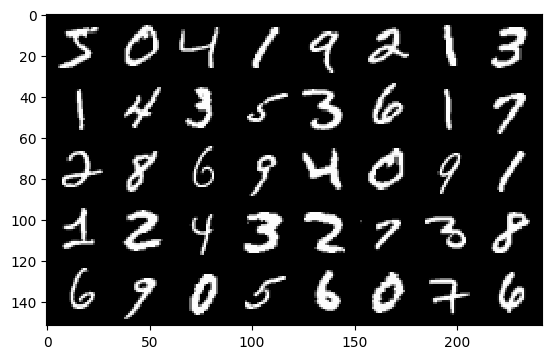

In [21]:
# 1. Loading and Processing Data
# 2. Display images
import torch
from torchvision import datasets
from torchvision import utils
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Loading a dataset
# path to store data and/or load datasets
path2data = "./data"

# loading training data
train_data = datasets.MNIST(path2data, train=True, download=True) # train = True

# extract data and targets
x_train, y_train = train_data.data, train_data.targets
print("Training dataset:")
print("\t", x_train.shape)
print("\t", y_train.shape)

# loading validation data
val_data = datasets.MNIST(path2data, train=False, download=True) #train = False

x_val, y_val = val_data.data, val_data.targets
print("Test dataset:")
print("\t", x_val.shape)
print("\t", y_val.shape)

# add a dimension to tensor to become B*C*H*W
if len(x_train.shape) == 3:
	x_train = x_train.unsqueeze(1)
print(x_train.shape)

if len(x_val.shape) == 3:
	x_val = x_val.unsqueeze(1)
print(x_val.shape)

# a helper function to display tensors as images
def show(img):
	# convert tensor to numpy array
	npimg = img.numpy()
	# convert to H*W*C shape
	npimg_tr = np.transpose(npimg, (1, 2, 0))
	plt.imshow(npimg_tr, interpolation='nearest')
	
# create a grid of images and display them
# make a grid of 40 images, 8 images per row
x_grid = utils.make_grid(x_train[:40], nrow=8, padding=2)
print(x_grid.shape)

# call helper function
show(x_grid)

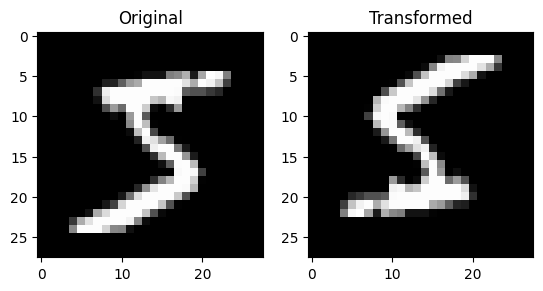

In [31]:
# Transform Data
from torchvision import transforms

# loading MNIST training dataset
train_data = datasets.MNIST(path2data, train=True, download=True)

# define transformations
data_transform = transforms.Compose([
	transforms.RandomHorizontalFlip(p=1),
	transforms.RandomVerticalFlip(p=1),
	transforms.ToTensor(),
])

# get a sample image from training dataset
img = train_data[0][0]

# transform sample image
img_tr = data_transform(img)

# convert tensor to numpy array
img_tr_np = img_tr.numpy()

# show original and transformed images
plt.subplot(1, 2, 1)
plt.imshow(img, cmap="gray")
plt.title("Original")

plt.subplot(1, 2, 2)
plt.imshow(img_tr_np[0], cmap="gray")
plt.title("Transformed")

# loading MNIST training data with on-the-fly transformations
train_data = datasets.MNIST(path2data, train=True, download=True, transform=data_transform)


In [23]:
# Wrapping tensors into a dataset
from torch.utils.data import TensorDataset

# wrap tensors into a dataset
train_ds = TensorDataset(x_train, y_train)
val_ds = TensorDataset(x_val, y_val)

for x,y in train_ds:
	print(x.shape, y.item())
	break

torch.Size([1, 28, 28]) 5


In [24]:
# Creating data loaders
from torch.utils.data import DataLoader

# create a data loader from dataset
train_dl = DataLoader(train_ds, batch_size=8)
val_dl = DataLoader(val_ds, batch_size=8)

# iterate over batch
for xb, yb in train_dl:
	print(xb.shape)
	print(yb.shape)
	break

torch.Size([8, 1, 28, 28])
torch.Size([8])


In [25]:
# Building models

# Defining a linear layer
from torch import nn
# input tensor dimension 64*1000
input_tensor = torch.randn(64, 1000)

# linear layer with 1000 inputs and 100 outputs
linear_layer = nn.Linear(1000, 100)

# output of the linear layer
output = linear_layer(input_tensor)

print(output.size())

torch.Size([64, 100])


In [26]:
# Defining models using nn.Sequential

from torch import nn

# define a two-layer model
model = nn.Sequential(
	nn.Linear(4, 5),
	nn.ReLU(),
	nn.Linear(5, 1),
)

print(model)

Sequential(
  (0): Linear(in_features=4, out_features=5, bias=True)
  (1): ReLU()
  (2): Linear(in_features=5, out_features=1, bias=True)
)


In [27]:
# Defining models using nn.Module
import torch.nn.functional as F

class Net(nn.Module): # function ke thua class nn.Module 
	def __init__(self):
		super(Net, self).__init__() # goi ham khoi tao cua class me (nn.Module)
		self.conv1 = nn.Conv2d(1, 8, 5, 1)
		self.conv2 = nn.Conv2d(8, 16, 5, 1)
		self.fc1 = nn.Linear(4*4*16, 100) #fully connected linear layers
		self.fc2 = nn.Linear(100, 10)

	def forward(self, x):
		x = F.relu(self.conv1(x))
		x = F.max_pool2d(x, 2, 2)
		x = F.relu(self.conv2(x))
		x = F.max_pool2d(x, 2, 2)
		x = x.view(-1, 4*4*16)
		x = F.relu(self.fc1(x))
		return F.log_softmax(x, dim=1)

model = Net()
print(model)
print(next(model.parameters()).device)

device = torch.device("cuda:0")
model.to(device)
print(next(model.parameters()).device)

Net(
  (conv1): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=10, bias=True)
)
cpu
cuda:0


In [30]:
# Printing the model summary

from torchsummary import summary
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 24, 24]             208
            Conv2d-2             [-1, 16, 8, 8]           3,216
            Linear-3                  [-1, 100]          25,700
Total params: 29,124
Trainable params: 29,124
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.04
Params size (MB): 0.11
Estimated Total Size (MB): 0.16
----------------------------------------------------------------


In [29]:
# Defining the loss function

from torch import nn
loss_func = nn.NLLLoss(reduction="sum")

for xb, yb in train_dl:
	# move batch to cuda device
	xb = xb.type(torch.float).to(device)
	yb = yb.to(device)
	# get model output
	out = model(xb)
	# calculate loss value
	loss = loss_func(out, yb)
	print(loss.item())
	break

# compute gradients
loss.backward()

541.1256713867188


In [32]:
# Defining the optimizer
from torch import optim
opt = optim.Adam(model.parameters(), lr=1e-4)

# update model parameters
opt.step()

# set gradients to zero
opt.zero_grad()

In [36]:
# function helper to compute the accuracy per mini-batch
def metrics_batch(target, output):
	# obtain output class
	pred = output.argmax(dim=1, keepdim=True)
	# compare output class with target class
	corrects = pred.eq(target.view_as(pred)).sum().item()
	return corrects

# function helper to compute the loss value per mini-batch
def loss_batch(loss_func, xb, yb, yb_h, opt=None):
	# obtain loss
	loss = loss_func(yb_h, yb)
	# obtain performance metric
	metric_b = metrics_batch(yb, yb_h)
	if opt is not None:
		loss.backward()
		opt.step()
		opt.zero_grad()

	return loss.item(), metric_b

# function helper to compute the loss and metric values for a dataset
def loss_epoch(model, loss_func, dataset_dl, opt=None):
	loss = 0.0
	metric = 0.0
	len_data = len(dataset_dl. dataset)
	for xb, yb in dataset_dl:
		xb = xb.type(torch.float).to(device)
		yb = yb.to(device)
		# obtain model output
		yb_h = model(xb)

		loss_b, metric_b = loss_batch(loss_func, xb, yb, yb_h, opt)
		loss += loss_b
		if metric_b is not None:
			metric += metric_b
	loss /= len_data
	metric /= len_data
	return loss, metric

def train_val(epochs, model, loss_func, opt, train_dl, val_dl):
	for epoch in range(epochs):
		model.train()
		train_loss, train_metric = loss_epoch(model, loss_func, train_dl, opt)
		
		model.eval()
		with torch.no_grad():
			val_loss, val_metric = loss_epoch(model, loss_func, val_dl)

		accuracy = 100*val_metric
		print("epoch: %d, train_loss: %.6f, val loss: %.6f, accuracy: %.2f" %(epoch, train_loss, val_loss, accuracy))

# call train_val function
num_epochs = 5
train_val(num_epochs, model, loss_func, opt, train_dl, val_dl)


epoch: 0, train_loss: 0.044560, val loss: 0.075155, accuracy: 97.87
epoch: 1, train_loss: 0.037983, val loss: 0.075276, accuracy: 97.79
epoch: 2, train_loss: 0.032897, val loss: 0.069345, accuracy: 98.01
epoch: 3, train_loss: 0.029240, val loss: 0.071501, accuracy: 98.05
epoch: 4, train_loss: 0.026175, val loss: 0.069582, accuracy: 98.08


In [ ]:
# Storing and loading models, FIRST METHOD

# define path2weights
path2weights="./models/weights.pt"

# store state_dict to file
torch.save(model.state_dict(), path2weights)

# load the model parameters form the file
# define model: weights are randomly initiated
_model = Net()

# load state_dict form the file
weights = torch.load(path2weights)

# set state_dict to the model
_model.load_state_dict(weights)

# set model in eval mode for deployment
_model.eval()

# model model to cuda device for accelerated computation
_model.to(device)


In [42]:
# # SECOND METHOD

# # store the model in a file
# path2model = "./models/model.pt"

# torch.save(model, path2model)

# # load the model parameters form the file
# _model = Net()

# _model = torch.load(path2data)

# # set model in eval mode for deployment
# _model.eval()

# # model model to cuda device for accelerated computation
# _model.to(device)